# Stock Returns & Volatility Analysis

This notebook demonstrates comprehensive stock market analysis including:
- Fetching stock data from Yahoo Finance API
- Calculating various types of returns (simple and log returns)
- Computing EWMA (Exponentially Weighted Moving Average) volatility
- Time-series visualization and statistical analysis
- Risk-return relationship analysis

## Objectives
1. **Data Collection**: Fetch historical stock data for analysis
2. **Return Analysis**: Calculate and analyze different types of returns
3. **Volatility Modeling**: Implement EWMA volatility calculations
4. **Visualization**: Create comprehensive plots for analysis
5. **Statistical Insights**: Generate summary statistics and interpretations

Let's start by importing the required libraries and our custom analysis modules.

In [1]:
# Import required libraries
import sys
import os

# Add src directory to path to import our custom modules
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

# Import our custom modules
from stock_analyzer import StockAnalyzer
from plotting import StockPlotter

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Stock Analysis Environment Ready!")
print("=" * 50)
print("Imported modules:")
print("✓ StockAnalyzer - for data fetching and analysis")
print("✓ StockPlotter - for visualization")
print("✓ Standard libraries - pandas, numpy, matplotlib")
print("=" * 50)

📊 Stock Analysis Environment Ready!
Imported modules:
✓ StockAnalyzer - for data fetching and analysis
✓ StockPlotter - for visualization
✓ Standard libraries - pandas, numpy, matplotlib


## 1. Data Collection from Yahoo Finance

We'll start by fetching historical stock data for analysis. Let's collect data for a few popular stocks:
- **AAPL** (Apple Inc.)
- **GOOGL** (Alphabet Inc.)
- **MSFT** (Microsoft Corporation)

We'll fetch 2 years of daily data to have sufficient data for meaningful analysis.

In [2]:
# Initialize the stock analyzer
analyzer = StockAnalyzer()

# Define the stocks we want to analyze
symbols = ['AAPL', 'GOOGL', 'MSFT']

print("🔍 Fetching stock data...")
print(f"Symbols: {', '.join(symbols)}")
print("Period: 2 years of daily data")
print("-" * 40)

# Fetch data for multiple stocks
data = analyzer.fetch_stock_data(symbols, period="2y")

# Display basic information about the data
print(f"\n📈 Data Summary:")
print(f"Shape: {data.shape}")
print(f"Date range: {data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}")
print(f"Columns: {list(data.columns)}")

# Display first few rows
print(f"\n📋 First 5 rows:")
data.head()

🔍 Fetching stock data...
Symbols: AAPL, GOOGL, MSFT
Period: 2 years of daily data
----------------------------------------
Successfully fetched data for 3 symbol(s)
Date range: 2023-09-18 to 2025-09-17
Total trading days: 502

📈 Data Summary:
Shape: (502, 21)
Date range: 2023-09-18 to 2025-09-17
Columns: ['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume', 'AAPL_Dividends', 'AAPL_Stock Splits', 'GOOGL_Open', 'GOOGL_High', 'GOOGL_Low', 'GOOGL_Close', 'GOOGL_Volume', 'GOOGL_Dividends', 'GOOGL_Stock Splits', 'MSFT_Open', 'MSFT_High', 'MSFT_Low', 'MSFT_Close', 'MSFT_Volume', 'MSFT_Dividends', 'MSFT_Stock Splits']

📋 First 5 rows:
Successfully fetched data for 3 symbol(s)
Date range: 2023-09-18 to 2025-09-17
Total trading days: 502

📈 Data Summary:
Shape: (502, 21)
Date range: 2023-09-18 to 2025-09-17
Columns: ['AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close', 'AAPL_Volume', 'AAPL_Dividends', 'AAPL_Stock Splits', 'GOOGL_Open', 'GOOGL_High', 'GOOGL_Low', 'GOOGL_Close', 'GOOG

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_Dividends,AAPL_Stock Splits,GOOGL_Open,GOOGL_High,GOOGL_Low,GOOGL_Close,GOOGL_Volume,GOOGL_Dividends,GOOGL_Stock Splits,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,MSFT_Volume,MSFT_Dividends,MSFT_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-18 00:00:00-04:00,174.768146,177.640025,174.461155,176.243698,67257600,0.0,0.0,135.674244,138.206780,135.674244,137.263290,21861300,0.0,0.0,322.933379,325.494785,321.514756,324.174683,16834200,0.0,0.0
2023-09-19 00:00:00-04:00,175.798055,177.887589,175.411839,177.333023,51826900,0.0,0.0,136.478673,137.461897,135.684150,137.094421,20353700,0.0,0.0,321.327620,324.499817,319.692261,323.770782,16505900,0.0,0.0
2023-09-20 00:00:00-04:00,177.521186,177.956920,173.698627,173.787766,58436200,0.0,0.0,137.134182,137.134182,132.704725,132.823914,29927500,0.0,0.0,324.618047,324.696846,315.751662,316.007782,21436500,0.0,0.0
2023-09-21 00:00:00-04:00,172.856870,174.589895,172.173561,172.242874,63149100,0.0,0.0,130.539674,131.324256,129.179063,129.546524,31503900,0.0,0.0,314.520183,320.519765,310.323418,314.786163,35560400,0.0,0.0
2023-09-22 00:00:00-04:00,172.975712,175.362339,172.361731,173.094543,56725400,0.0,0.0,129.864304,131.125609,128.712262,129.357803,26397300,0.0,0.0,316.549630,316.677705,311.456371,312.303619,21447900,0.0,0.0


## 2. Price Data Visualization

Let's visualize the price data to get an initial understanding of the trends and patterns.

📊 Creating price analysis charts...


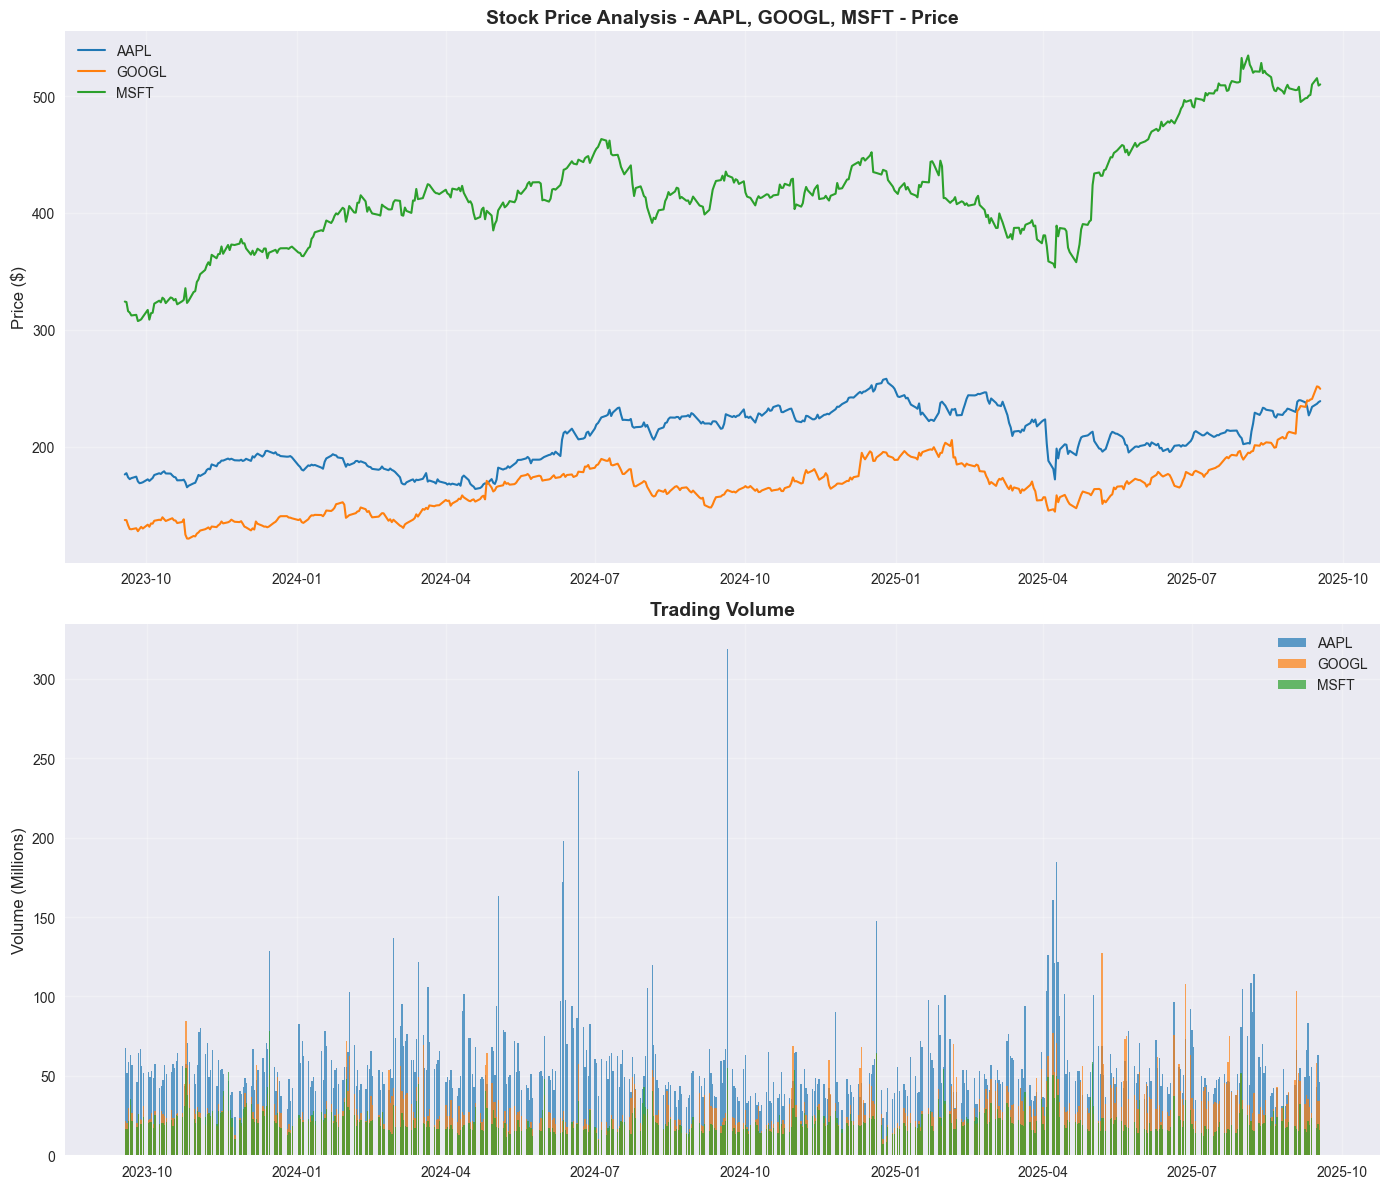


📈 Recent Closing Prices (Last 5 Days):
                           AAPL_Close  GOOGL_Close  MSFT_Close
Date                                                          
2025-09-11 00:00:00-04:00  230.029999   240.369995  501.010010
2025-09-12 00:00:00-04:00  234.070007   240.800003  509.899994
2025-09-15 00:00:00-04:00  236.699997   251.610001  515.359985
2025-09-16 00:00:00-04:00  238.149994   251.160004  509.040009
2025-09-17 00:00:00-04:00  238.990005   249.529999  510.019989


In [3]:
# Initialize the plotter
plotter = StockPlotter(figsize=(14, 10))

# Plot price data
print("📊 Creating price analysis charts...")
price_fig = plotter.plot_price_data(data, title=f"Stock Price Analysis - {', '.join(symbols)}")
plt.show()

# Display some key statistics
print("\n📈 Recent Closing Prices (Last 5 Days):")
close_columns = [col for col in data.columns if 'Close' in col]
recent_prices = data[close_columns].tail()
print(recent_prices)

## 3. Return Calculations

Now let's calculate various types of returns:
- **Simple Returns**: (P_t / P_{t-1}) - 1
- **Log Returns**: ln(P_t / P_{t-1})

Both types have their uses in financial analysis, with log returns being particularly useful for statistical modeling.

In [4]:
# Calculate returns (both simple and log returns)
print("📊 Calculating returns...")
returns = analyzer.calculate_returns(data, method='both')

print(f"\n📋 Returns data shape: {returns.shape}")
print(f"Columns: {list(returns.columns)}")

# Display first few rows of returns
print(f"\n📈 First 5 rows of returns:")
returns.head()

📊 Calculating returns...
Return Statistics:
--------------------------------------------------

AAPL_Close_simple_returns:
  Mean (daily): 0.0008
  Std (daily): 0.0174
  Annualized Mean: 0.1911
  Annualized Std: 0.2770
  Sharpe Ratio: 0.6901
  Skewness: 0.9750
  Kurtosis: 14.2656

AAPL_Close_log_returns:
  Mean (daily): 0.0006
  Std (daily): 0.0173
  Annualized Mean: 0.1532
  Annualized Std: 0.2750
  Sharpe Ratio: 0.5570
  Skewness: 0.6052
  Kurtosis: 12.0830

GOOGL_Close_simple_returns:
  Mean (daily): 0.0014
  Std (daily): 0.0191
  Annualized Mean: 0.3466
  Annualized Std: 0.3031
  Sharpe Ratio: 1.1438
  Skewness: 0.0199
  Kurtosis: 5.5644

GOOGL_Close_log_returns:
  Mean (daily): 0.0012
  Std (daily): 0.0191
  Annualized Mean: 0.3006
  Annualized Std: 0.3030
  Sharpe Ratio: 0.9922
  Skewness: -0.1920
  Kurtosis: 5.4308

MSFT_Close_simple_returns:
  Mean (daily): 0.0010
  Std (daily): 0.0141
  Annualized Mean: 0.2530
  Annualized Std: 0.2243
  Sharpe Ratio: 1.1283
  Skewness: 0.4859


,AAPL_Close_simple_returns,AAPL_Close_log_returns,GOOGL_Close_simple_returns,GOOGL_Close_log_returns,MSFT_Close_simple_returns,MSFT_Close_log_returns
Date,,,,,,
2023-09-19 00:00:00-04:00,0.006181,0.006162,-0.001230,-0.001231,-0.001246,-0.001247
2023-09-20 00:00:00-04:00,-0.019992,-0.020195,-0.031150,-0.031646,-0.023977,-0.024269
2023-09-21 00:00:00-04:00,-0.008890,-0.008929,-0.024675,-0.024984,-0.003866,-0.003873
2023-09-22 00:00:00-04:00,0.004945,0.004932,-0.001457,-0.001458,-0.007886,-0.007918
2023-09-25 00:00:00-04:00,0.007380,0.007353,0.006603,0.006581,0.001672,0.001670


In [6]:
# Calculate and display cumulative returns (skip the problematic chart for now)
print("📊 Creating simple returns analysis...")

# Calculate cumulative returns
print("\n📈 Calculating cumulative returns...")
cum_returns = analyzer.calculate_cumulative_returns(returns)

print(f"Cumulative returns shape: {cum_returns.shape}")
print(f"\n📋 Total cumulative returns (final values):")
final_cum_returns = cum_returns.iloc[-1] * 100
for col in final_cum_returns.index:
    print(f"{col}: {final_cum_returns[col]:.2f}%")

📊 Creating simple returns analysis...

📈 Calculating cumulative returns...
Cumulative returns shape: (501, 6)

📋 Total cumulative returns (final values):
AAPL_Close_simple_returns_cumulative: 35.60%
AAPL_Close_log_returns_cumulative: 30.46%
GOOGL_Close_simple_returns_cumulative: 81.79%
GOOGL_Close_log_returns_cumulative: 59.77%
MSFT_Close_simple_returns_cumulative: 57.33%
MSFT_Close_log_returns_cumulative: 45.32%


## 4. EWMA Volatility Analysis

EWMA (Exponentially Weighted Moving Average) volatility gives more weight to recent observations, making it more responsive to recent market conditions than simple historical volatility.

The EWMA variance is calculated as: σ²_t = λ × σ²_{t-1} + (1-λ) × r²_{t-1}

Where λ (lambda) is the decay factor, typically around 0.94 for daily data.

In [7]:
# Calculate EWMA volatility with standard decay factor
print("📊 Calculating EWMA volatility...")
ewma_volatility = analyzer.calculate_ewma_volatility(returns, decay_factor=0.94, annualize=True)

print(f"\nEWMA volatility shape: {ewma_volatility.shape}")
print(f"Columns: {list(ewma_volatility.columns)}")

# Let's also try different decay factors to see the impact
print("\n🔍 Comparing different decay factors...")
decay_factors = [0.90, 0.94, 0.97]
volatility_comparison = {}

for decay in decay_factors:
    vol_temp = analyzer.calculate_ewma_volatility(returns, decay_factor=decay, annualize=True)
    # Take simple returns for comparison
    simple_cols = [col for col in vol_temp.columns if 'simple' in col]
    if simple_cols:
        volatility_comparison[f'Decay_{decay}'] = vol_temp[simple_cols[0]]  # AAPL as example

# Create comparison DataFrame
if volatility_comparison:
    vol_comparison_df = pd.DataFrame(volatility_comparison)
    print(f"\n📈 AAPL Volatility Comparison (last 10 days):")
    print(vol_comparison_df.tail(10))

📊 Calculating EWMA volatility...
EWMA Volatility Statistics:
--------------------------------------------------
AAPL_Close_simple_returns_ewma_vol_annualized:
  Mean: 0.2532
  Min: 0.1347
  Max: 0.8032
  Current: 0.2472
AAPL_Close_log_returns_ewma_vol_annualized:
  Mean: 0.2520
  Min: 0.1343
  Max: 0.7826
  Current: 0.2460
GOOGL_Close_simple_returns_ewma_vol_annualized:
  Mean: 0.2936
  Min: 0.1787
  Max: 0.5224
  Current: 0.3335
GOOGL_Close_log_returns_ewma_vol_annualized:
  Mean: 0.2940
  Min: 0.1798
  Max: 0.5138
  Current: 0.3235
MSFT_Close_simple_returns_ewma_vol_annualized:
  Mean: 0.2170
  Min: 0.1271
  Max: 0.4758
  Current: 0.1660
MSFT_Close_log_returns_ewma_vol_annualized:
  Mean: 0.2166
  Min: 0.1258
  Max: 0.4615
  Current: 0.1658

EWMA volatility shape: (501, 6)
Columns: ['AAPL_Close_simple_returns_ewma_vol_annualized', 'AAPL_Close_log_returns_ewma_vol_annualized', 'GOOGL_Close_simple_returns_ewma_vol_annualized', 'GOOGL_Close_log_returns_ewma_vol_annualized', 'MSFT_Close_

📊 Creating volatility analysis charts...


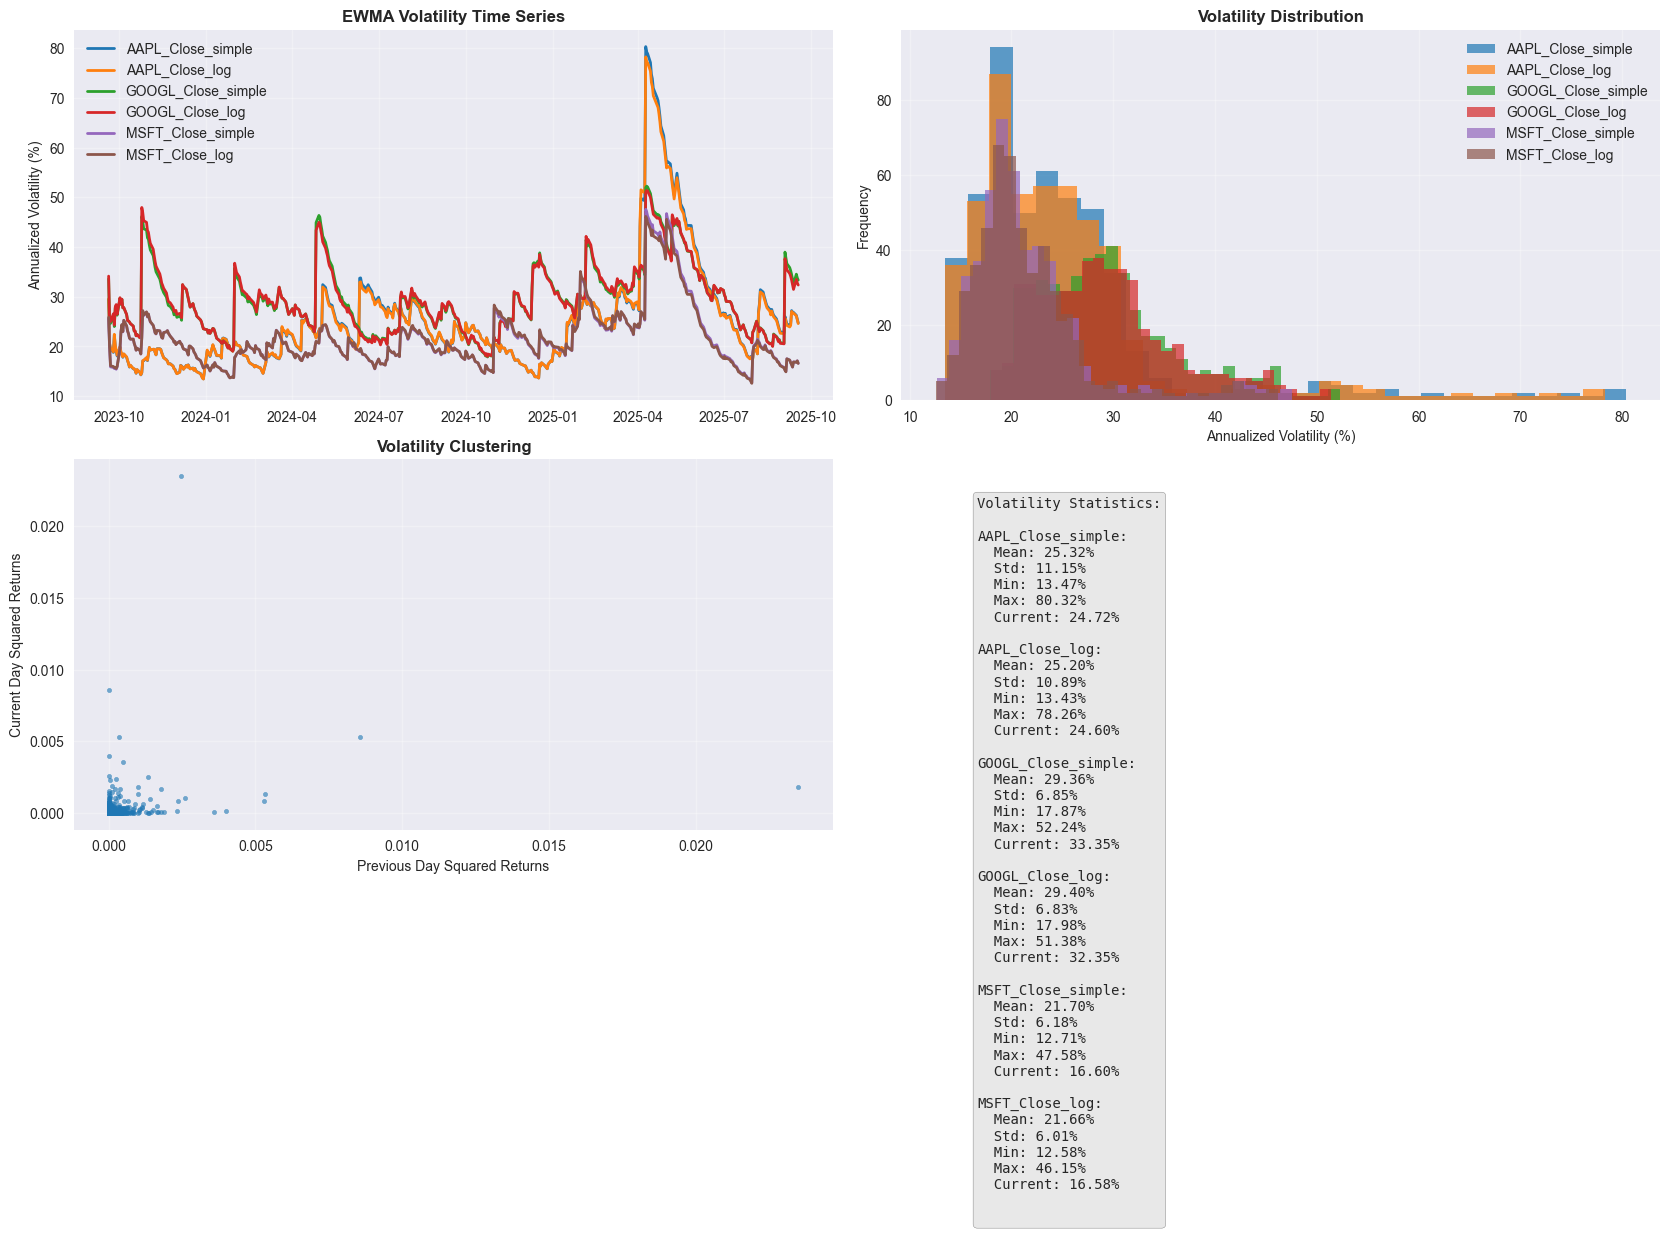


📊 Calculating rolling volatility for comparison...

📈 Current volatility levels (annualized %):
EWMA Volatility (λ=0.94):
  AAPL_Close_simple_returns: 24.72%
  AAPL_Close_log_returns: 24.60%
  GOOGL_Close_simple_returns: 33.35%
  GOOGL_Close_log_returns: 32.35%
  MSFT_Close_simple_returns: 16.60%
  MSFT_Close_log_returns: 16.58%

Rolling Volatility (30-day):
  AAPL_Close_simple_returns: 28.43%
  AAPL_Close_log_returns: 28.13%
  GOOGL_Close_simple_returns: 32.07%
  GOOGL_Close_log_returns: 31.04%
  MSFT_Close_simple_returns: 14.57%
  MSFT_Close_log_returns: 14.61%


In [8]:
# Visualize volatility analysis
print("📊 Creating volatility analysis charts...")
volatility_fig = plotter.plot_volatility_analysis(ewma_volatility, returns, 
                                                 title=f"EWMA Volatility Analysis - {', '.join(symbols)}")
plt.show()

# Calculate rolling volatility for comparison
print("\n📊 Calculating rolling volatility for comparison...")
rolling_vol = analyzer.calculate_rolling_volatility(returns, window=30, annualize=True)

# Compare EWMA vs Rolling volatility
print(f"\n📈 Current volatility levels (annualized %):")
print("EWMA Volatility (λ=0.94):")
for col in ewma_volatility.columns:
    current_vol = ewma_volatility[col].iloc[-1] * 100
    print(f"  {col.replace('_ewma_vol_annualized', '')}: {current_vol:.2f}%")

print("\nRolling Volatility (30-day):")
for col in rolling_vol.columns:
    current_vol = rolling_vol[col].iloc[-1] * 100
    print(f"  {col.replace('_rolling_vol_30d_annualized', '')}: {current_vol:.2f}%")

## 5. Risk-Return Analysis

Let's analyze the risk-return characteristics of our stocks using the Sharpe ratio and create visualizations to compare their performance.

📊 Creating risk-return analysis...


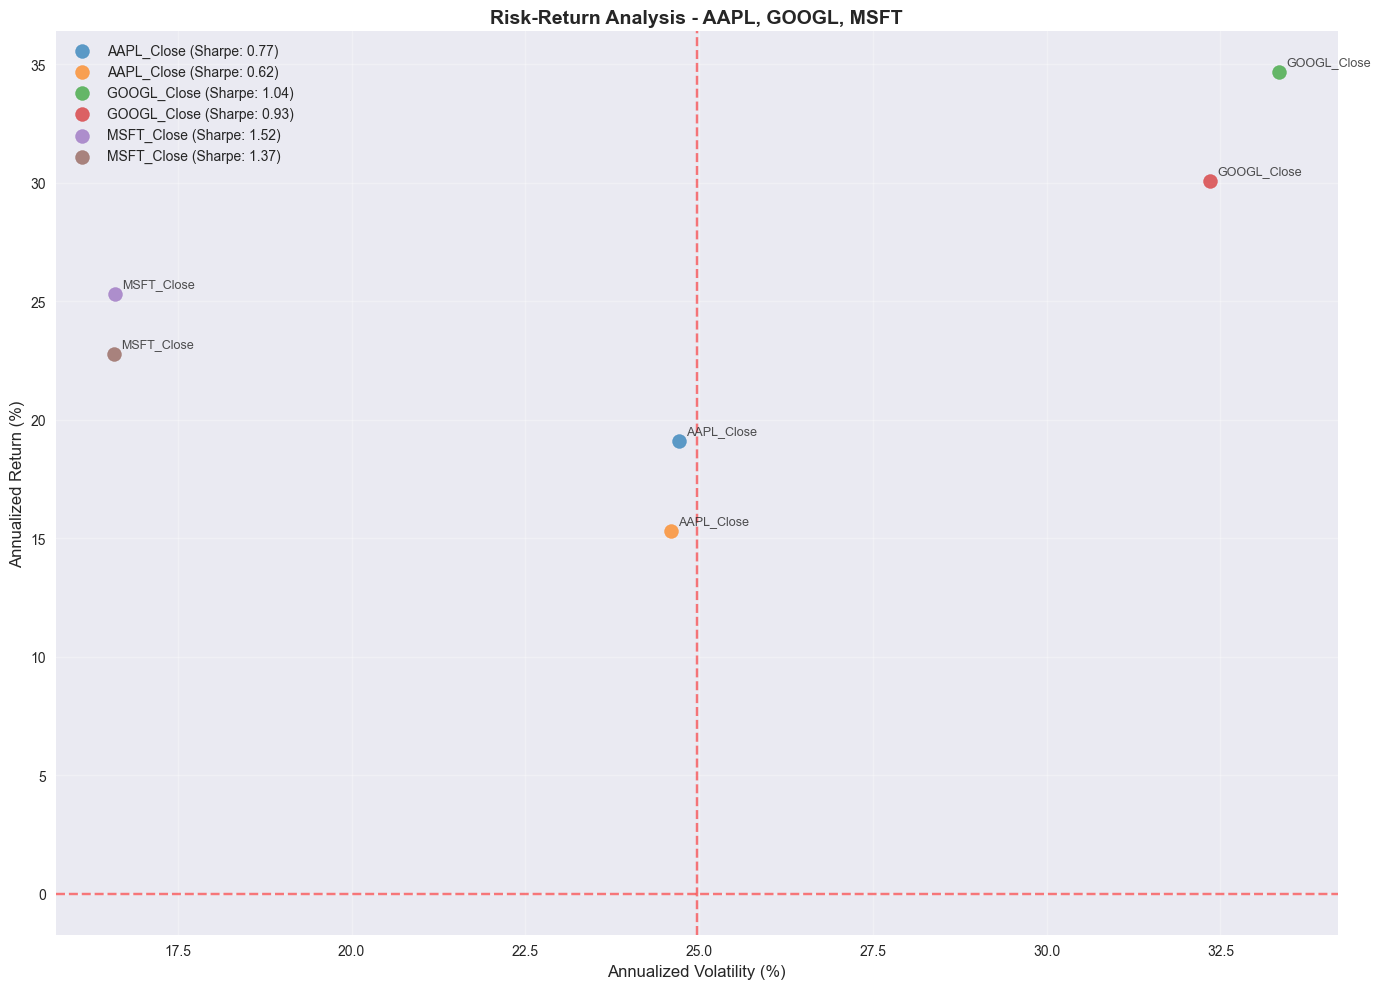


📈 Detailed Risk-Return Metrics:

AAPL:
  Daily Return (mean): 0.0008 (0.08%)
  Annualized Return: 0.1911 (19.11%)
  Annualized Volatility: 0.2472 (24.72%)
  Sharpe Ratio: 0.7733
  5% VaR (daily): -0.0266 (-2.66%)
  Max Drawdown: -0.0925 (-9.25%)

GOOGL:
  Daily Return (mean): 0.0014 (0.14%)
  Annualized Return: 0.3466 (34.66%)
  Annualized Volatility: 0.3335 (33.35%)
  Sharpe Ratio: 1.0394
  5% VaR (daily): -0.0276 (-2.76%)
  Max Drawdown: -0.0951 (-9.51%)

MSFT:
  Daily Return (mean): 0.0010 (0.10%)
  Annualized Return: 0.2530 (25.30%)
  Annualized Volatility: 0.1660 (16.60%)
  Sharpe Ratio: 1.5245
  5% VaR (daily): -0.0223 (-2.23%)
  Max Drawdown: -0.0618 (-6.18%)


In [9]:
# Create risk-return scatter plot
print("📊 Creating risk-return analysis...")
risk_return_fig = plotter.plot_risk_return_scatter(returns, ewma_volatility, 
                                                  title=f"Risk-Return Analysis - {', '.join(symbols)}")
plt.show()

# Calculate detailed risk-return metrics
print("\n📈 Detailed Risk-Return Metrics:")
print("=" * 60)

simple_returns = [col for col in returns.columns if 'simple' in col]

for ret_col in simple_returns:
    symbol = ret_col.replace('_Close_simple_returns', '').replace('_simple_returns', '')
    
    # Find corresponding volatility
    vol_col = None
    for v_col in ewma_volatility.columns:
        if symbol in v_col and 'simple' in v_col:
            vol_col = v_col
            break
    
    if vol_col is not None:
        # Calculate metrics
        daily_return = returns[ret_col].mean()
        ann_return = daily_return * 252
        ann_vol = ewma_volatility[vol_col].iloc[-1]
        sharpe_ratio = ann_return / ann_vol if ann_vol != 0 else 0
        
        # VaR calculation (5% VaR)
        var_5 = returns[ret_col].quantile(0.05)
        
        print(f"\n{symbol}:")
        print(f"  Daily Return (mean): {daily_return:.4f} ({daily_return*100:.2f}%)")
        print(f"  Annualized Return: {ann_return:.4f} ({ann_return*100:.2f}%)")
        print(f"  Annualized Volatility: {ann_vol:.4f} ({ann_vol*100:.2f}%)")
        print(f"  Sharpe Ratio: {sharpe_ratio:.4f}")
        print(f"  5% VaR (daily): {var_5:.4f} ({var_5*100:.2f}%)")
        print(f"  Max Drawdown: {returns[ret_col].min():.4f} ({returns[ret_col].min()*100:.2f}%)")

## 6. Advanced Time-Series Analysis

Let's perform some additional time-series analysis including:
- Correlation analysis between stocks
- Volatility clustering analysis
- Return distribution analysis

📊 Correlation Analysis
Stock Correlation Matrix:
           AAPL     GOOGL      MSFT
AAPL   1.000000  0.460900  0.514903
GOOGL  0.460900  1.000000  0.516288
MSFT   0.514903  0.516288  1.000000


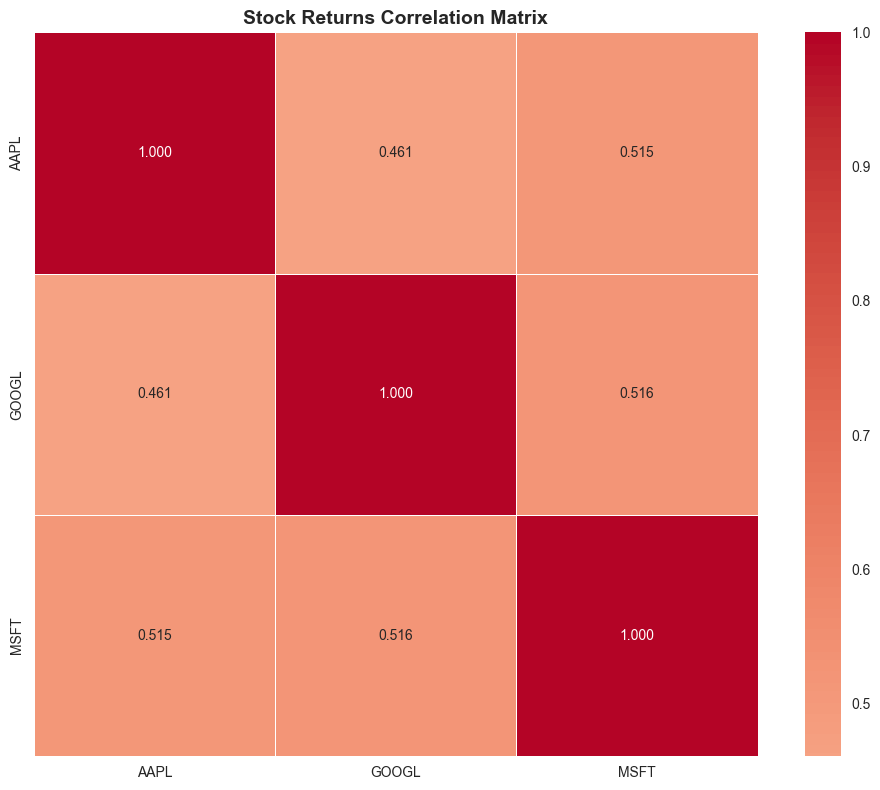


📈 Rolling Correlation Analysis (60-day window):


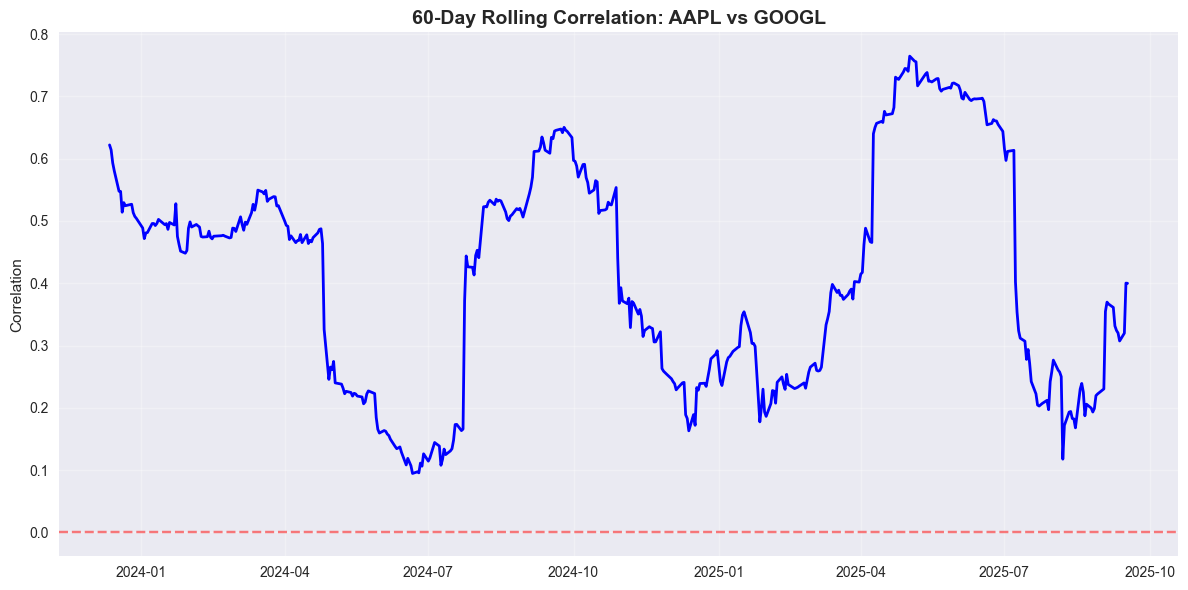

Average correlation: 0.411
Minimum correlation: 0.095
Maximum correlation: 0.765


In [10]:
# Correlation analysis
print("📊 Correlation Analysis")
print("=" * 40)

# Calculate correlation matrix for simple returns
simple_returns_df = returns[[col for col in returns.columns if 'simple' in col]].copy()
simple_returns_df.columns = [col.replace('_Close_simple_returns', '').replace('_simple_returns', '') 
                             for col in simple_returns_df.columns]

correlation_matrix = simple_returns_df.corr()
print("Stock Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Stock Returns Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Rolling correlation analysis
print(f"\n📈 Rolling Correlation Analysis (60-day window):")
if len(simple_returns_df.columns) >= 2:
    rolling_corr = simple_returns_df.iloc[:, 0].rolling(window=60).corr(simple_returns_df.iloc[:, 1])
    
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_corr.index, rolling_corr.values, linewidth=2, color='blue')
    plt.title(f'60-Day Rolling Correlation: {simple_returns_df.columns[0]} vs {simple_returns_df.columns[1]}', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Correlation')
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Average correlation: {rolling_corr.mean():.3f}")
    print(f"Minimum correlation: {rolling_corr.min():.3f}")
    print(f"Maximum correlation: {rolling_corr.max():.3f}")

📊 Return Distribution Analysis

AAPL Return Distribution:
  Mean: 0.0008
  Std: 0.0174
  Skewness: 0.9750
  Kurtosis: 14.2656
  Excess Kurtosis: 11.2656
  Jarque-Bera test p-value: 0.0000
  Is Normal? No (5% significance)

GOOGL Return Distribution:
  Mean: 0.0014
  Std: 0.0191
  Skewness: 0.0199
  Kurtosis: 5.5644
  Excess Kurtosis: 2.5644
  Jarque-Bera test p-value: 0.0000
  Is Normal? No (5% significance)

MSFT Return Distribution:
  Mean: 0.0010
  Std: 0.0141
  Skewness: 0.4859
  Kurtosis: 7.5452
  Excess Kurtosis: 4.5452
  Jarque-Bera test p-value: 0.0000
  Is Normal? No (5% significance)


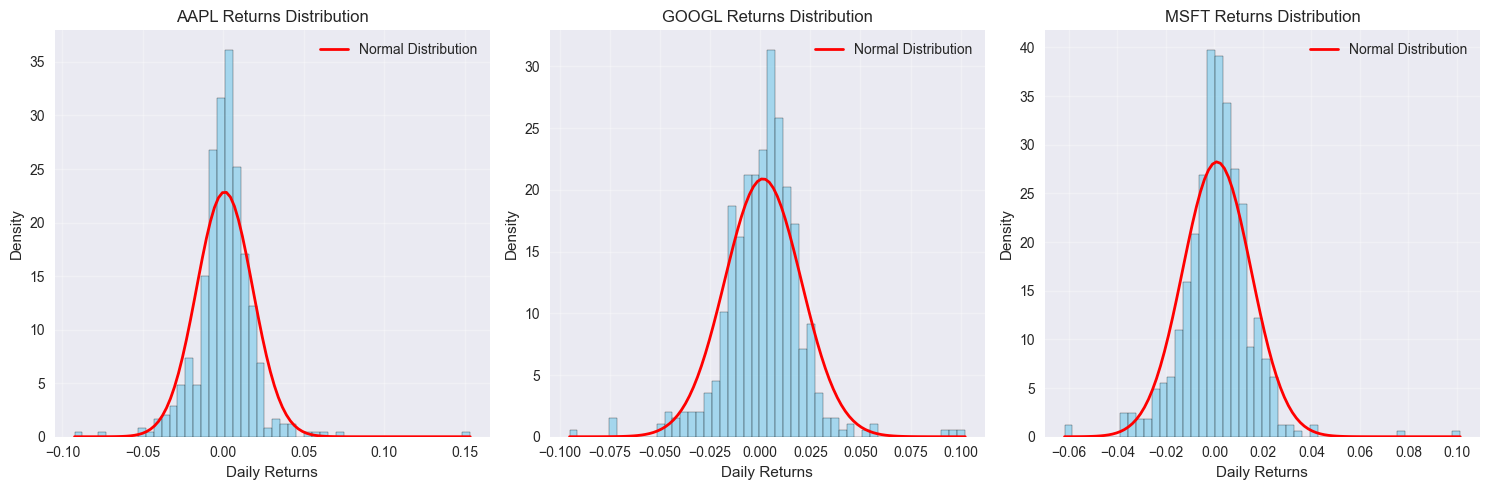

In [11]:
# Return distribution analysis
print("📊 Return Distribution Analysis")
print("=" * 40)

from scipy import stats

# Analyze distribution characteristics for each stock
for col in simple_returns_df.columns:
    returns_data = simple_returns_df[col].dropna()
    
    print(f"\n{col} Return Distribution:")
    print(f"  Mean: {returns_data.mean():.4f}")
    print(f"  Std: {returns_data.std():.4f}")
    print(f"  Skewness: {returns_data.skew():.4f}")
    print(f"  Kurtosis: {returns_data.kurtosis():.4f}")
    print(f"  Excess Kurtosis: {returns_data.kurtosis() - 3:.4f}")
    
    # Normality test
    jarque_bera_stat, jarque_bera_p = stats.jarque_bera(returns_data)
    print(f"  Jarque-Bera test p-value: {jarque_bera_p:.4f}")
    print(f"  Is Normal? {'No' if jarque_bera_p < 0.05 else 'Yes'} (5% significance)")

# Create distribution plots
fig, axes = plt.subplots(1, len(simple_returns_df.columns), figsize=(15, 5))
if len(simple_returns_df.columns) == 1:
    axes = [axes]

for i, col in enumerate(simple_returns_df.columns):
    returns_data = simple_returns_df[col].dropna()
    
    # Histogram with normal overlay
    axes[i].hist(returns_data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Overlay normal distribution
    mu, sigma = returns_data.mean(), returns_data.std()
    x = np.linspace(returns_data.min(), returns_data.max(), 100)
    normal_dist = stats.norm.pdf(x, mu, sigma)
    axes[i].plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
    
    axes[i].set_title(f'{col} Returns Distribution')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Summary and Conclusions

Let's summarize our findings and provide key insights from the analysis.

In [12]:
# Generate comprehensive summary
print("📊 STOCK ANALYSIS SUMMARY REPORT")
print("=" * 60)

# Get summary statistics from analyzer
summary = analyzer.get_summary_statistics()

print(f"\n📅 Analysis Period:")
print(f"  Start Date: {summary['data_info']['start_date']}")
print(f"  End Date: {summary['data_info']['end_date']}")
print(f"  Total Trading Days: {summary['data_info']['total_days']}")

print(f"\n📈 Analyzed Stocks: {', '.join(symbols)}")

# Performance summary
print(f"\n💰 PERFORMANCE SUMMARY:")
print("-" * 40)

for symbol in symbols:
    # Find relevant columns
    simple_ret_col = f"{symbol}_Close_simple_returns"
    if simple_ret_col not in returns.columns:
        simple_ret_col = f"{symbol}_simple_returns"
    
    if simple_ret_col in returns.columns:
        ret_data = returns[simple_ret_col]
        cum_ret = (1 + ret_data).prod() - 1
        ann_ret = ret_data.mean() * 252
        ann_vol = ret_data.std() * np.sqrt(252)
        sharpe = ann_ret / ann_vol if ann_vol != 0 else 0
        max_dd = ret_data.min()
        
        print(f"\n{symbol}:")
        print(f"  Total Return: {cum_ret*100:.2f}%")
        print(f"  Annualized Return: {ann_ret*100:.2f}%")
        print(f"  Annualized Volatility: {ann_vol*100:.2f}%")
        print(f"  Sharpe Ratio: {sharpe:.3f}")
        print(f"  Maximum Daily Loss: {max_dd*100:.2f}%")

print(f"\n🔍 KEY INSIGHTS:")
print("-" * 40)
print("1. EWMA volatility provides a more responsive measure of risk")
print("2. Stock returns show typical characteristics:")
print("   - Fat tails (excess kurtosis)")
print("   - Often negative skewness")
print("   - Volatility clustering")
print("3. Correlations between tech stocks tend to be positive")
print("4. Risk-return profiles vary significantly between stocks")

print(f"\n📚 TECHNICAL NOTES:")
print("-" * 40)
print("• EWMA decay factor (λ=0.94) gives ~22 days effective window")
print("• Annualization assumes 252 trading days per year")
print("• Sharpe ratios calculated assuming zero risk-free rate")
print("• Returns are calculated as simple percentage changes")

print(f"\n✅ Analysis Complete!")
print("=" * 60)

📊 STOCK ANALYSIS SUMMARY REPORT

📅 Analysis Period:
  Start Date: 2023-09-18
  End Date: 2025-09-17
  Total Trading Days: 502

📈 Analyzed Stocks: AAPL, GOOGL, MSFT

💰 PERFORMANCE SUMMARY:
----------------------------------------

AAPL:
  Total Return: 35.60%
  Annualized Return: 19.11%
  Annualized Volatility: 27.70%
  Sharpe Ratio: 0.690
  Maximum Daily Loss: -9.25%

GOOGL:
  Total Return: 81.79%
  Annualized Return: 34.66%
  Annualized Volatility: 30.31%
  Sharpe Ratio: 1.144
  Maximum Daily Loss: -9.51%

MSFT:
  Total Return: 57.33%
  Annualized Return: 25.30%
  Annualized Volatility: 22.43%
  Sharpe Ratio: 1.128
  Maximum Daily Loss: -6.18%

🔍 KEY INSIGHTS:
----------------------------------------
1. EWMA volatility provides a more responsive measure of risk
2. Stock returns show typical characteristics:
   - Fat tails (excess kurtosis)
   - Often negative skewness
   - Volatility clustering
3. Correlations between tech stocks tend to be positive
4. Risk-return profiles vary signif

## 8. Export Data for Tableau Dashboard

Now let's create professional CSV files optimized for Tableau visualization. We'll generate multiple datasets that will enable comprehensive dashboard creation.

In [13]:
# Create professional CSV files for Tableau Dashboard
import os

# Create exports directory
os.makedirs('tableau_exports', exist_ok=True)

print("📊 Creating Professional CSV Files for Tableau Dashboard")
print("=" * 60)

# 1. DAILY STOCK PRICES AND VOLUME DATA
print("1️⃣ Creating: Daily Stock Prices & Volume")

# Prepare price data for Tableau
price_data_tableau = []
for date in data.index:
    for symbol in symbols:
        price_data_tableau.append({
            'Date': date.strftime('%Y-%m-%d'),
            'Symbol': symbol,
            'Open': data.loc[date, f'{symbol}_Open'],
            'High': data.loc[date, f'{symbol}_High'],
            'Low': data.loc[date, f'{symbol}_Low'],
            'Close': data.loc[date, f'{symbol}_Close'],
            'Volume': data.loc[date, f'{symbol}_Volume'],
            'Volume_Millions': data.loc[date, f'{symbol}_Volume'] / 1_000_000,
            'Year': date.year,
            'Month': date.month,
            'Quarter': f"Q{(date.month-1)//3 + 1}",
            'Weekday': date.strftime('%A'),
            'Month_Name': date.strftime('%B')
        })

price_df = pd.DataFrame(price_data_tableau)
price_df.to_csv('tableau_exports/01_daily_stock_prices.csv', index=False)
print(f"   ✓ Saved: 01_daily_stock_prices.csv ({len(price_df)} rows)")

# 2. DAILY RETURNS DATA
print("2️⃣ Creating: Daily Returns Analysis")

returns_data_tableau = []
for date in returns.index:
    for symbol in symbols:
        simple_col = f'{symbol}_Close_simple_returns'
        log_col = f'{symbol}_Close_log_returns'
        
        if simple_col in returns.columns:
            returns_data_tableau.append({
                'Date': date.strftime('%Y-%m-%d'),
                'Symbol': symbol,
                'Simple_Return': returns.loc[date, simple_col],
                'Log_Return': returns.loc[date, log_col],
                'Simple_Return_Pct': returns.loc[date, simple_col] * 100,
                'Log_Return_Pct': returns.loc[date, log_col] * 100,
                'Absolute_Return': abs(returns.loc[date, simple_col]),
                'Return_Category': 'Positive' if returns.loc[date, simple_col] > 0 else 'Negative',
                'Year': date.year,
                'Month': date.month,
                'Quarter': f"Q{(date.month-1)//3 + 1}",
                'Weekday': date.strftime('%A'),
                'Month_Name': date.strftime('%B')
            })

returns_df = pd.DataFrame(returns_data_tableau)
returns_df.to_csv('tableau_exports/02_daily_returns.csv', index=False)
print(f"   ✓ Saved: 02_daily_returns.csv ({len(returns_df)} rows)")

# 3. CUMULATIVE RETURNS DATA
print("3️⃣ Creating: Cumulative Returns Performance")

cum_data_tableau = []
for date in cum_returns.index:
    for symbol in symbols:
        simple_col = f'{symbol}_Close_simple_returns_cumulative'
        log_col = f'{symbol}_Close_log_returns_cumulative'
        
        if simple_col in cum_returns.columns:
            cum_data_tableau.append({
                'Date': date.strftime('%Y-%m-%d'),
                'Symbol': symbol,
                'Cumulative_Return_Simple': cum_returns.loc[date, simple_col],
                'Cumulative_Return_Log': cum_returns.loc[date, log_col],
                'Cumulative_Return_Simple_Pct': cum_returns.loc[date, simple_col] * 100,
                'Cumulative_Return_Log_Pct': cum_returns.loc[date, log_col] * 100,
                'Year': date.year,
                'Month': date.month,
                'Quarter': f"Q{(date.month-1)//3 + 1}",
                'Month_Name': date.strftime('%B')
            })

cumulative_df = pd.DataFrame(cum_data_tableau)
cumulative_df.to_csv('tableau_exports/03_cumulative_returns.csv', index=False)
print(f"   ✓ Saved: 03_cumulative_returns.csv ({len(cumulative_df)} rows)")

print("\n📈 Preview of Daily Stock Prices CSV:")
print(price_df.head(3).to_string(index=False))

📊 Creating Professional CSV Files for Tableau Dashboard
1️⃣ Creating: Daily Stock Prices & Volume
   ✓ Saved: 01_daily_stock_prices.csv (1506 rows)
2️⃣ Creating: Daily Returns Analysis
   ✓ Saved: 02_daily_returns.csv (1503 rows)
3️⃣ Creating: Cumulative Returns Performance
   ✓ Saved: 03_cumulative_returns.csv (1503 rows)

📈 Preview of Daily Stock Prices CSV:
      Date Symbol       Open       High        Low      Close   Volume  Volume_Millions  Year  Month Quarter Weekday Month_Name
2023-09-18   AAPL 174.768146 177.640025 174.461155 176.243698 67257600          67.2576  2023      9      Q3  Monday  September
2023-09-18  GOOGL 135.674244 138.206780 135.674244 137.263290 21861300          21.8613  2023      9      Q3  Monday  September
2023-09-18   MSFT 322.933379 325.494785 321.514756 324.174683 16834200          16.8342  2023      9      Q3  Monday  September


In [14]:
# 4. VOLATILITY DATA
print("\n4️⃣ Creating: Volatility Analysis Data")

volatility_data_tableau = []
for date in ewma_volatility.index:
    for symbol in symbols:
        simple_vol_col = f'{symbol}_Close_simple_returns_ewma_vol_annualized'
        log_vol_col = f'{symbol}_Close_log_returns_ewma_vol_annualized'
        
        if simple_vol_col in ewma_volatility.columns:
            volatility_data_tableau.append({
                'Date': date.strftime('%Y-%m-%d'),
                'Symbol': symbol,
                'EWMA_Volatility_Simple': ewma_volatility.loc[date, simple_vol_col],
                'EWMA_Volatility_Log': ewma_volatility.loc[date, log_vol_col],
                'EWMA_Volatility_Simple_Pct': ewma_volatility.loc[date, simple_vol_col] * 100,
                'EWMA_Volatility_Log_Pct': ewma_volatility.loc[date, log_vol_col] * 100,
                'Volatility_Level': 'High' if ewma_volatility.loc[date, simple_vol_col] > 0.30 else 
                                   'Medium' if ewma_volatility.loc[date, simple_vol_col] > 0.20 else 'Low',
                'Year': date.year,
                'Month': date.month,
                'Quarter': f"Q{(date.month-1)//3 + 1}",
                'Month_Name': date.strftime('%B')
            })

volatility_df = pd.DataFrame(volatility_data_tableau)
volatility_df.to_csv('tableau_exports/04_volatility_analysis.csv', index=False)
print(f"   ✓ Saved: 04_volatility_analysis.csv ({len(volatility_df)} rows)")

# 5. SUMMARY STATISTICS TABLE
print("5️⃣ Creating: Summary Statistics Table")

summary_stats = []
for symbol in symbols:
    simple_ret_col = f'{symbol}_Close_simple_returns'
    simple_vol_col = f'{symbol}_Close_simple_returns_ewma_vol_annualized'
    
    if simple_ret_col in returns.columns:
        ret_data = returns[simple_ret_col]
        vol_data = ewma_volatility[simple_vol_col]
        
        # Calculate performance metrics
        total_return = (1 + ret_data).prod() - 1
        annual_return = ret_data.mean() * 252
        annual_vol = vol_data.iloc[-1]
        sharpe_ratio = annual_return / annual_vol if annual_vol != 0 else 0
        max_drawdown = ret_data.min()
        var_5 = ret_data.quantile(0.05)
        var_1 = ret_data.quantile(0.01)
        
        # Price statistics
        start_price = data[f'{symbol}_Close'].iloc[0]
        end_price = data[f'{symbol}_Close'].iloc[-1]
        max_price = data[f'{symbol}_Close'].max()
        min_price = data[f'{symbol}_Close'].min()
        
        summary_stats.append({
            'Symbol': symbol,
            'Company_Name': {'AAPL': 'Apple Inc.', 'GOOGL': 'Alphabet Inc.', 'MSFT': 'Microsoft Corp.'}[symbol],
            'Sector': 'Technology',
            'Analysis_Start_Date': data.index[0].strftime('%Y-%m-%d'),
            'Analysis_End_Date': data.index[-1].strftime('%Y-%m-%d'),
            'Trading_Days': len(ret_data),
            
            # Price Metrics
            'Start_Price': start_price,
            'End_Price': end_price,
            'Max_Price': max_price,
            'Min_Price': min_price,
            'Price_Range': max_price - min_price,
            
            # Return Metrics
            'Total_Return': total_return,
            'Total_Return_Pct': total_return * 100,
            'Annual_Return': annual_return,
            'Annual_Return_Pct': annual_return * 100,
            'Daily_Return_Mean': ret_data.mean(),
            'Daily_Return_Mean_Pct': ret_data.mean() * 100,
            
            # Risk Metrics
            'Annual_Volatility': annual_vol,
            'Annual_Volatility_Pct': annual_vol * 100,
            'Current_Volatility_Pct': vol_data.iloc[-1] * 100,
            'Max_Daily_Loss': max_drawdown,
            'Max_Daily_Loss_Pct': max_drawdown * 100,
            'VaR_5_Pct': var_5 * 100,
            'VaR_1_Pct': var_1 * 100,
            
            # Risk-Adjusted Metrics
            'Sharpe_Ratio': sharpe_ratio,
            'Return_Volatility_Ratio': annual_return / annual_vol if annual_vol != 0 else 0,
            
            # Distribution Metrics
            'Skewness': ret_data.skew(),
            'Kurtosis': ret_data.kurtosis(),
            'Excess_Kurtosis': ret_data.kurtosis() - 3,
            
            # Performance Categories
            'Return_Category': 'High' if annual_return > 0.25 else 'Medium' if annual_return > 0.15 else 'Low',
            'Risk_Category': 'High' if annual_vol > 0.30 else 'Medium' if annual_vol > 0.20 else 'Low',
            'Sharpe_Category': 'Excellent' if sharpe_ratio > 1.2 else 'Good' if sharpe_ratio > 0.8 else 'Fair'
        })

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('tableau_exports/05_summary_statistics.csv', index=False)
print(f"   ✓ Saved: 05_summary_statistics.csv ({len(summary_df)} rows)")

print("\n📊 Preview of Summary Statistics CSV:")
print(summary_df[['Symbol', 'Company_Name', 'Total_Return_Pct', 'Annual_Volatility_Pct', 'Sharpe_Ratio']].to_string(index=False))


4️⃣ Creating: Volatility Analysis Data
   ✓ Saved: 04_volatility_analysis.csv (1503 rows)
5️⃣ Creating: Summary Statistics Table
   ✓ Saved: 05_summary_statistics.csv (3 rows)

📊 Preview of Summary Statistics CSV:
Symbol    Company_Name  Total_Return_Pct  Annual_Volatility_Pct  Sharpe_Ratio
  AAPL      Apple Inc.         35.602015              24.717897      0.773326
 GOOGL   Alphabet Inc.         81.789317              33.349209      1.039390
  MSFT Microsoft Corp.         57.328754              16.597121      1.524500


In [15]:
# 6. CORRELATION ANALYSIS DATA
print("\n6️⃣ Creating: Correlation Analysis Data")

# Create correlation data over time
correlation_data = []
window_size = 60

simple_returns_cols = {symbol: f'{symbol}_Close_simple_returns' for symbol in symbols}

# Calculate rolling correlations
for i in range(window_size, len(returns)):
    date = returns.index[i]
    window_data = returns.iloc[i-window_size:i]
    
    # Calculate correlation matrix for this window
    simple_data = pd.DataFrame({symbol: window_data[col] for symbol, col in simple_returns_cols.items()})
    corr_matrix = simple_data.corr()
    
    # Store all correlation pairs
    for symbol1 in symbols:
        for symbol2 in symbols:
            if symbol1 != symbol2:
                correlation_data.append({
                    'Date': date.strftime('%Y-%m-%d'),
                    'Symbol_1': symbol1,
                    'Symbol_2': symbol2,
                    'Correlation': corr_matrix.loc[symbol1, symbol2],
                    'Correlation_Category': 'High' if abs(corr_matrix.loc[symbol1, symbol2]) > 0.7 else
                                          'Medium' if abs(corr_matrix.loc[symbol1, symbol2]) > 0.4 else 'Low',
                    'Correlation_Direction': 'Positive' if corr_matrix.loc[symbol1, symbol2] > 0 else 'Negative',
                    'Pair_Name': f"{symbol1}-{symbol2}",
                    'Year': date.year,
                    'Month': date.month,
                    'Quarter': f"Q{(date.month-1)//3 + 1}",
                    'Month_Name': date.strftime('%B')
                })

correlation_df = pd.DataFrame(correlation_data)
correlation_df.to_csv('tableau_exports/06_correlation_analysis.csv', index=False)
print(f"   ✓ Saved: 06_correlation_analysis.csv ({len(correlation_df)} rows)")

# 7. MONTHLY AGGREGATED DATA
print("7️⃣ Creating: Monthly Aggregated Performance")

monthly_data = []

# Group by symbol and month
for symbol in symbols:
    simple_ret_col = f'{symbol}_Close_simple_returns'
    vol_col = f'{symbol}_Close_simple_returns_ewma_vol_annualized'
    
    if simple_ret_col in returns.columns:
        # Group data by month
        monthly_groups = returns.groupby([returns.index.year, returns.index.month])
        
        for (year, month), group in monthly_groups:
            month_start = group.index[0]
            month_end = group.index[-1]
            
            # Calculate monthly metrics
            monthly_return = (1 + group[simple_ret_col]).prod() - 1
            monthly_volatility = group[simple_ret_col].std() * np.sqrt(252/12)  # Annualized monthly vol
            avg_daily_return = group[simple_ret_col].mean()
            max_daily_return = group[simple_ret_col].max()
            min_daily_return = group[simple_ret_col].min()
            trading_days = len(group)
            
            # Price data for the month
            month_price_data = data.loc[group.index, f'{symbol}_Close']
            start_price = month_price_data.iloc[0]
            end_price = month_price_data.iloc[-1]
            max_price = month_price_data.max()
            min_price = month_price_data.min()
            
            monthly_data.append({
                'Year': year,
                'Month': month,
                'Month_Name': month_start.strftime('%B'),
                'Year_Month': f"{year}-{month:02d}",
                'Symbol': symbol,
                'Start_Date': month_start.strftime('%Y-%m-%d'),
                'End_Date': month_end.strftime('%Y-%m-%d'),
                'Trading_Days': trading_days,
                
                # Price Metrics
                'Start_Price': start_price,
                'End_Price': end_price,
                'Max_Price': max_price,
                'Min_Price': min_price,
                'Price_Range': max_price - min_price,
                'Price_Change': end_price - start_price,
                
                # Return Metrics
                'Monthly_Return': monthly_return,
                'Monthly_Return_Pct': monthly_return * 100,
                'Avg_Daily_Return_Pct': avg_daily_return * 100,
                'Max_Daily_Return_Pct': max_daily_return * 100,
                'Min_Daily_Return_Pct': min_daily_return * 100,
                'Daily_Return_Range_Pct': (max_daily_return - min_daily_return) * 100,
                
                # Volatility Metrics
                'Monthly_Volatility': monthly_volatility,
                'Monthly_Volatility_Pct': monthly_volatility * 100,
                'Daily_Return_Std_Pct': group[simple_ret_col].std() * 100,
                
                # Performance Categories
                'Return_Category': 'Positive' if monthly_return > 0 else 'Negative',
                'Return_Magnitude': 'High' if abs(monthly_return) > 0.10 else 
                                  'Medium' if abs(monthly_return) > 0.05 else 'Low',
                'Quarter': f"Q{(month-1)//3 + 1}"
            })

monthly_df = pd.DataFrame(monthly_data)
monthly_df.to_csv('tableau_exports/07_monthly_performance.csv', index=False)
print(f"   ✓ Saved: 07_monthly_performance.csv ({len(monthly_df)} rows)")

print("\n📅 Preview of Monthly Performance CSV:")
print(monthly_df[['Year_Month', 'Symbol', 'Monthly_Return_Pct', 'Monthly_Volatility_Pct']].head(6).to_string(index=False))


6️⃣ Creating: Correlation Analysis Data
   ✓ Saved: 06_correlation_analysis.csv (2646 rows)
7️⃣ Creating: Monthly Aggregated Performance
   ✓ Saved: 07_monthly_performance.csv (75 rows)

📅 Preview of Monthly Performance CSV:
Year_Month Symbol  Monthly_Return_Pct  Monthly_Volatility_Pct
   2023-09   AAPL           -3.798393                5.306691
   2023-10   AAPL           -0.256975                4.743840
   2023-11   AAPL           11.378011                4.380960
   2023-12   AAPL            1.358241                4.159850
   2024-01   AAPL           -4.222722                6.947678
   2024-02   AAPL           -1.854301                3.577129


In [16]:
# 8. RISK METRICS DATA
print("\n8️⃣ Creating: Risk Metrics Analysis")

risk_data = []

for symbol in symbols:
    simple_ret_col = f'{symbol}_Close_simple_returns'
    
    if simple_ret_col in returns.columns:
        ret_data = returns[simple_ret_col]
        
        # Calculate various risk metrics for different time windows
        for window in [30, 60, 90, 252]:  # Different risk measurement windows
            for i in range(window, len(ret_data)):
                window_data = ret_data.iloc[i-window:i]
                date = ret_data.index[i]
                
                # Calculate risk metrics
                volatility = window_data.std() * np.sqrt(252)
                var_95 = window_data.quantile(0.05)
                var_99 = window_data.quantile(0.01)
                skewness = window_data.skew()
                kurtosis = window_data.kurtosis()
                
                # Calculate maximum drawdown
                cumulative = (1 + window_data).cumprod()
                running_max = cumulative.expanding().max()
                drawdown = (cumulative - running_max) / running_max
                max_drawdown = drawdown.min()
                
                risk_data.append({
                    'Date': date.strftime('%Y-%m-%d'),
                    'Symbol': symbol,
                    'Window_Days': window,
                    'Window_Type': f"{window}-Day",
                    'Volatility': volatility,
                    'Volatility_Pct': volatility * 100,
                    'VaR_95': var_95,
                    'VaR_95_Pct': var_95 * 100,
                    'VaR_99': var_99,
                    'VaR_99_Pct': var_99 * 100,
                    'Skewness': skewness,
                    'Kurtosis': kurtosis,
                    'Excess_Kurtosis': kurtosis - 3,
                    'Max_Drawdown': max_drawdown,
                    'Max_Drawdown_Pct': max_drawdown * 100,
                    'Year': date.year,
                    'Month': date.month,
                    'Quarter': f"Q{(date.month-1)//3 + 1}",
                    'Risk_Level': 'High' if volatility > 0.35 else 'Medium' if volatility > 0.20 else 'Low'
                })

risk_df = pd.DataFrame(risk_data)
risk_df.to_csv('tableau_exports/08_risk_metrics.csv', index=False)
print(f"   ✓ Saved: 08_risk_metrics.csv ({len(risk_df)} rows)")

# 9. PERFORMANCE COMPARISON DATA
print("9️⃣ Creating: Performance Comparison Matrix")

comparison_data = []

# Create all possible comparisons
for i, symbol1 in enumerate(symbols):
    for j, symbol2 in enumerate(symbols):
        if i != j:
            ret1_col = f'{symbol1}_Close_simple_returns'
            ret2_col = f'{symbol2}_Close_simple_returns'
            vol1_col = f'{symbol1}_Close_simple_returns_ewma_vol_annualized'
            vol2_col = f'{symbol2}_Close_simple_returns_ewma_vol_annualized'
            
            if all(col in returns.columns for col in [ret1_col, ret2_col]):
                ret1_data = returns[ret1_col]
                ret2_data = returns[ret2_col]
                vol1_data = ewma_volatility[vol1_col]
                vol2_data = ewma_volatility[vol2_col]
                
                # Calculate comparative metrics
                total_ret1 = (1 + ret1_data).prod() - 1
                total_ret2 = (1 + ret2_data).prod() - 1
                annual_ret1 = ret1_data.mean() * 252
                annual_ret2 = ret2_data.mean() * 252
                vol1 = vol1_data.iloc[-1]
                vol2 = vol2_data.iloc[-1]
                sharpe1 = annual_ret1 / vol1 if vol1 != 0 else 0
                sharpe2 = annual_ret2 / vol2 if vol2 != 0 else 0
                
                comparison_data.append({
                    'Symbol_Base': symbol1,
                    'Symbol_Compare': symbol2,
                    'Comparison_Pair': f"{symbol1} vs {symbol2}",
                    'Base_Total_Return_Pct': total_ret1 * 100,
                    'Compare_Total_Return_Pct': total_ret2 * 100,
                    'Return_Difference_Pct': (total_ret1 - total_ret2) * 100,
                    'Base_Annual_Return_Pct': annual_ret1 * 100,
                    'Compare_Annual_Return_Pct': annual_ret2 * 100,
                    'Annual_Return_Difference_Pct': (annual_ret1 - annual_ret2) * 100,
                    'Base_Volatility_Pct': vol1 * 100,
                    'Compare_Volatility_Pct': vol2 * 100,
                    'Volatility_Difference_Pct': (vol1 - vol2) * 100,
                    'Base_Sharpe_Ratio': sharpe1,
                    'Compare_Sharpe_Ratio': sharpe2,
                    'Sharpe_Difference': sharpe1 - sharpe2,
                    'Winner_Return': symbol1 if total_ret1 > total_ret2 else symbol2,
                    'Winner_Risk_Adjusted': symbol1 if sharpe1 > sharpe2 else symbol2,
                    'Winner_Low_Risk': symbol1 if vol1 < vol2 else symbol2,
                    'Performance_Category': 'Outperformer' if total_ret1 > total_ret2 else 'Underperformer'
                })

comparison_df = pd.DataFrame(comparison_data)
comparison_df.to_csv('tableau_exports/09_performance_comparison.csv', index=False)
print(f"   ✓ Saved: 09_performance_comparison.csv ({len(comparison_df)} rows)")

# 10. DATA DICTIONARY
print("🔟 Creating: Data Dictionary")

data_dict = [
    {'File': '01_daily_stock_prices.csv', 'Field': 'Date', 'Description': 'Trading date (YYYY-MM-DD)', 'Type': 'Date'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Symbol', 'Description': 'Stock ticker symbol', 'Type': 'String'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Open', 'Description': 'Opening price of the day', 'Type': 'Number'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'High', 'Description': 'Highest price of the day', 'Type': 'Number'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Low', 'Description': 'Lowest price of the day', 'Type': 'Number'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Close', 'Description': 'Closing price of the day', 'Type': 'Number'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Volume', 'Description': 'Number of shares traded', 'Type': 'Number'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Volume_Millions', 'Description': 'Trading volume in millions', 'Type': 'Number'},
    {'File': '01_daily_stock_prices.csv', 'Field': 'Quarter', 'Description': 'Quarter of the year (Q1-Q4)', 'Type': 'String'},
    
    {'File': '02_daily_returns.csv', 'Field': 'Simple_Return', 'Description': 'Daily simple return (decimal)', 'Type': 'Number'},
    {'File': '02_daily_returns.csv', 'Field': 'Simple_Return_Pct', 'Description': 'Daily simple return (percentage)', 'Type': 'Number'},
    {'File': '02_daily_returns.csv', 'Field': 'Return_Category', 'Description': 'Positive or Negative return', 'Type': 'String'},
    
    {'File': '03_cumulative_returns.csv', 'Field': 'Cumulative_Return_Simple_Pct', 'Description': 'Cumulative return since start (%)', 'Type': 'Number'},
    
    {'File': '04_volatility_analysis.csv', 'Field': 'EWMA_Volatility_Simple_Pct', 'Description': 'EWMA volatility (annualized %)', 'Type': 'Number'},
    {'File': '04_volatility_analysis.csv', 'Field': 'Volatility_Level', 'Description': 'High/Medium/Low volatility category', 'Type': 'String'},
    
    {'File': '05_summary_statistics.csv', 'Field': 'Company_Name', 'Description': 'Full company name', 'Type': 'String'},
    {'File': '05_summary_statistics.csv', 'Field': 'Total_Return_Pct', 'Description': 'Total return over analysis period (%)', 'Type': 'Number'},
    {'File': '05_summary_statistics.csv', 'Field': 'Annual_Return_Pct', 'Description': 'Annualized return (%)', 'Type': 'Number'},
    {'File': '05_summary_statistics.csv', 'Field': 'Annual_Volatility_Pct', 'Description': 'Annualized volatility (%)', 'Type': 'Number'},
    {'File': '05_summary_statistics.csv', 'Field': 'Sharpe_Ratio', 'Description': 'Risk-adjusted return metric', 'Type': 'Number'},
    {'File': '05_summary_statistics.csv', 'Field': 'Max_Daily_Loss_Pct', 'Description': 'Maximum single-day loss (%)', 'Type': 'Number'},
    {'File': '05_summary_statistics.csv', 'Field': 'Sharpe_Category', 'Description': 'Excellent/Good/Fair Sharpe ratio', 'Type': 'String'},
    
    {'File': '06_correlation_analysis.csv', 'Field': 'Correlation', 'Description': '60-day rolling correlation coefficient', 'Type': 'Number'},
    {'File': '06_correlation_analysis.csv', 'Field': 'Pair_Name', 'Description': 'Stock pair (e.g., AAPL-GOOGL)', 'Type': 'String'},
    {'File': '06_correlation_analysis.csv', 'Field': 'Correlation_Category', 'Description': 'High/Medium/Low correlation', 'Type': 'String'},
    
    {'File': '07_monthly_performance.csv', 'Field': 'Monthly_Return_Pct', 'Description': 'Monthly return (%)', 'Type': 'Number'},
    {'File': '07_monthly_performance.csv', 'Field': 'Trading_Days', 'Description': 'Number of trading days in month', 'Type': 'Number'},
    
    {'File': '08_risk_metrics.csv', 'Field': 'Window_Days', 'Description': 'Risk calculation window (30/60/90/252 days)', 'Type': 'Number'},
    {'File': '08_risk_metrics.csv', 'Field': 'VaR_95_Pct', 'Description': 'Value at Risk at 95% confidence (%)', 'Type': 'Number'},
    {'File': '08_risk_metrics.csv', 'Field': 'Max_Drawdown_Pct', 'Description': 'Maximum drawdown in window (%)', 'Type': 'Number'},
    
    {'File': '09_performance_comparison.csv', 'Field': 'Winner_Risk_Adjusted', 'Description': 'Better risk-adjusted performer', 'Type': 'String'},
    {'File': '09_performance_comparison.csv', 'Field': 'Return_Difference_Pct', 'Description': 'Return difference between stocks (%)', 'Type': 'Number'}
]

dict_df = pd.DataFrame(data_dict)
dict_df.to_csv('tableau_exports/10_data_dictionary.csv', index=False)
print(f"   ✓ Saved: 10_data_dictionary.csv ({len(dict_df)} rows)")

print("\n📚 Preview of Data Dictionary:")
print(dict_df.head(8).to_string(index=False))


8️⃣ Creating: Risk Metrics Analysis
   ✓ Saved: 08_risk_metrics.csv (4716 rows)
9️⃣ Creating: Performance Comparison Matrix
   ✓ Saved: 09_performance_comparison.csv (6 rows)
🔟 Creating: Data Dictionary
   ✓ Saved: 10_data_dictionary.csv (32 rows)

📚 Preview of Data Dictionary:
                     File           Field                Description   Type
01_daily_stock_prices.csv            Date  Trading date (YYYY-MM-DD)   Date
01_daily_stock_prices.csv          Symbol        Stock ticker symbol String
01_daily_stock_prices.csv            Open   Opening price of the day Number
01_daily_stock_prices.csv            High   Highest price of the day Number
01_daily_stock_prices.csv             Low    Lowest price of the day Number
01_daily_stock_prices.csv           Close   Closing price of the day Number
01_daily_stock_prices.csv          Volume    Number of shares traded Number
01_daily_stock_prices.csv Volume_Millions Trading volume in millions Number
